In [1]:
from MLP.MLP import Dense, ActivationSoftmax, CategoricalCrossEntropyLoss, ActivationReLU, Backpropagation
import numpy as np
from keras.datasets import mnist
from tqdm import tqdm



Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
from data.ImageLoader import preprocessImage
x_train = preprocessImage(x_train)
x_test = preprocessImage(x_test)

In [4]:
n_values = np.max(y_train) + 1
y_train = np.eye(n_values)[y_train]

In [61]:
#Create Layer
dense_0 = Dense(784, 128)
activation0 = ActivationReLU()
dense_1 = Dense(128, 10)
activation1 = ActivationSoftmax()
CELoss = CategoricalCrossEntropyLoss()
backprop = Backpropagation(0.1)

In [62]:
loss = []
acc = []
for _ in tqdm(range(100)):
    #forward
    dense_0.forward(x_train[:100])
    activation0.forward(dense_0.output)
    dense_1.forward(activation0.output)
    activation1.forward(dense_1.output)
    acc.append((np.argmax(activation1.output, axis=-1) == np.argmax(y_train[:100], axis=-1)).mean())
    loss.append(CELoss.forward(activation1.output, y_train[:100]))
    #backward
    CELoss.backward(activation1.output, y_train[:100])
    dense_1.backward(CELoss.dinputs)
    activation0.backward(dense_1.dinputs)
    dense_0.backward(activation0.dinputs)
    #update Weight
    backprop.updateParams(dense_1)
    backprop.updateParams(dense_0)


100%|██████████| 100/100 [00:00<00:00, 340.34it/s]


In [63]:
import matplotlib.pyplot as plt

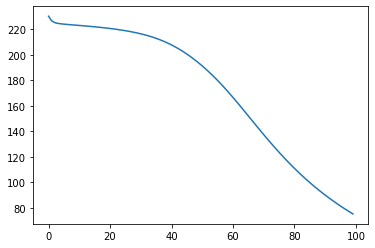

In [64]:
plt.plot(np.sum(loss, axis=1))

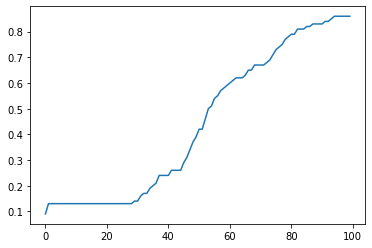

In [65]:
plt.plot(acc)